# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: \ Torero, William Klien B.
_Student No._:\ 2022-10739
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 11/30/2024

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** William Klien B. Torero

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: <font color='red'>**100/100**</font>

Score breakdown:
* Problem 1 - <font color='red'>**100/100**</font>

<font color='red'>**signed GC Belinario**</font>

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

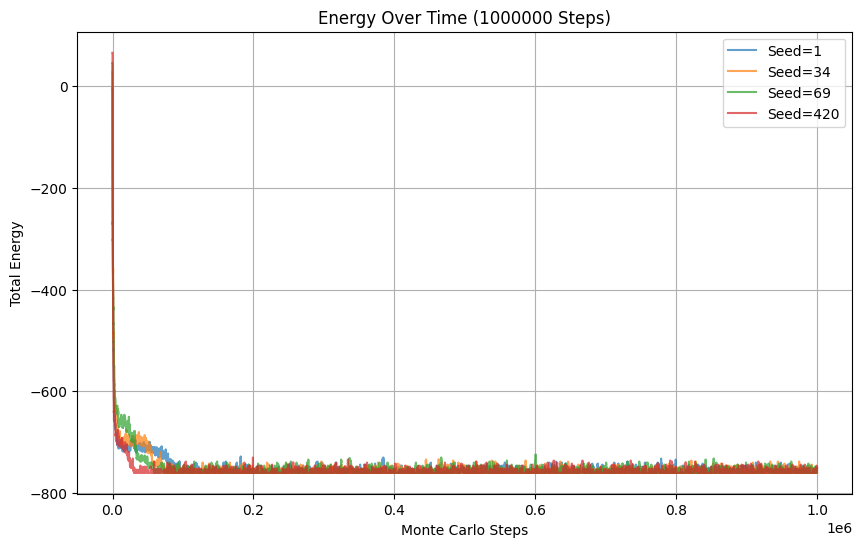

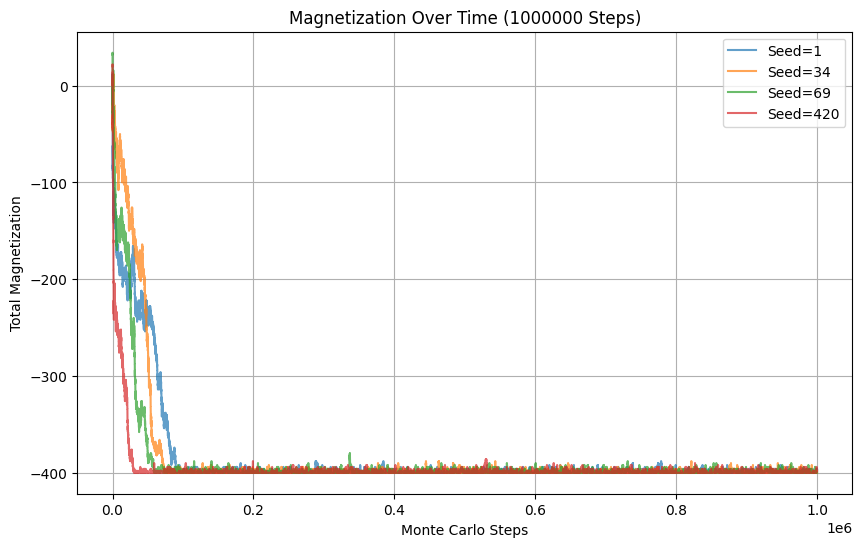

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import math

L = 20  # Size of lattice
J = 1  # Coupling constant
kb = 1.0  # Boltzmann constant
T = 1  # Temperature of the system
monte_carlo_steps = 1000000  # Number of Monte Carlo Steps
seeds = [1, 34, 69, 420]  # List of seeds

# Initialized a lattice with size 20x20 and with different seeds and given spins
lattices = [
    np.random.default_rng(seed).choice([-1, 1], size=(L, L)) for seed in seeds
]

# Defining a function to calculate the energy of the lattice
def compute_energy(lattice):
    s1 = lattice[:-1, :] * lattice[1:, :] # Interaction between vertically adjacent spins
    s2 = lattice[:, :-1] * lattice[:, 1:] # Interaction between horizontally adjacent spins
    E = -J * (np.sum(s1) + np.sum(s2)) # Calculating the total energy of the system
    return E

# Function to run the simulation for a given lattice
def simulation(lattice):
    current_E = compute_energy(lattice) # Calculating the initial energy of the lattiice
    current_M = np.sum(lattice) # Calculating the initial magnetization by adding all the spins

    E_plot = []  # Initialized an empty array to store energy values over time
    M_plot = []  # Initialized an empty array to store magnetization values over time

    # Iterate the simulation over the given number of steps
    for k in range(monte_carlo_steps):
        i = np.random.randint(0, L) # Choosing a random row index
        j = np.random.randint(0, L) # Choosing a random column index

        # Flippiing the spin of the chosen lattice site
        lattice[i, j] *= -1

        new_E = compute_energy(lattice) # New energy with the updated lattice site
        E_difference = new_E - current_E # Calculating the change in energy due to updated lattice site

        # If the energy increases due to updated lattice site
        if E_difference > 0:
            if np.random.rand() < math.exp(-T * E_difference):  # Accept (Note EQ. 10.60 in the book)
                current_E += E_difference # Update the energy
                current_M = np.sum(lattice) # Update the magnetization
            else: # Reject
                lattice[i, j] *= -1  # Flipping the spin again
        # If the energy decreases, the lattice will always be accepted
        else:
            current_E += E_difference # Update the energy
            current_M = np.sum(lattice) # Update the magnetization

        E_plot.append(current_E) # Append the values of energy to the empty list
        M_plot.append(current_M) # Append the values of magnetization to the empty list

    return E_plot, M_plot

# Simulate all the lattices
data = [simulation(lattice.copy()) for lattice in lattices]

# Plot for energy
plt.style.use('default')
plt.figure(figsize=(10, 6))
# Iterate through energy values for each seed
for x, (E_plot, _) in enumerate(data):
    seed = seeds[x] # Get the specific seed value
    plt.plot(E_plot, label=f"Seed={seed}", alpha=0.7)
plt.title("Energy Over Time (1000000 Steps)")
plt.xlabel("Monte Carlo Steps")
plt.ylabel("Total Energy")
plt.legend()
plt.grid(True)
plt.show()

# Plot for magnetization
plt.style.use('default')
plt.figure(figsize=(10, 6))
# Iterate through magnetization values for each seed
for x, (_, M_plot) in enumerate(data):
    seed = seeds[x] # Get specific seed value
    plt.plot(M_plot, label=f"Seed={seed}", alpha=0.7)
plt.title("Magnetization Over Time (1000000 Steps)")
plt.xlabel("Monte Carlo Steps")
plt.ylabel("Total Magnetization")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


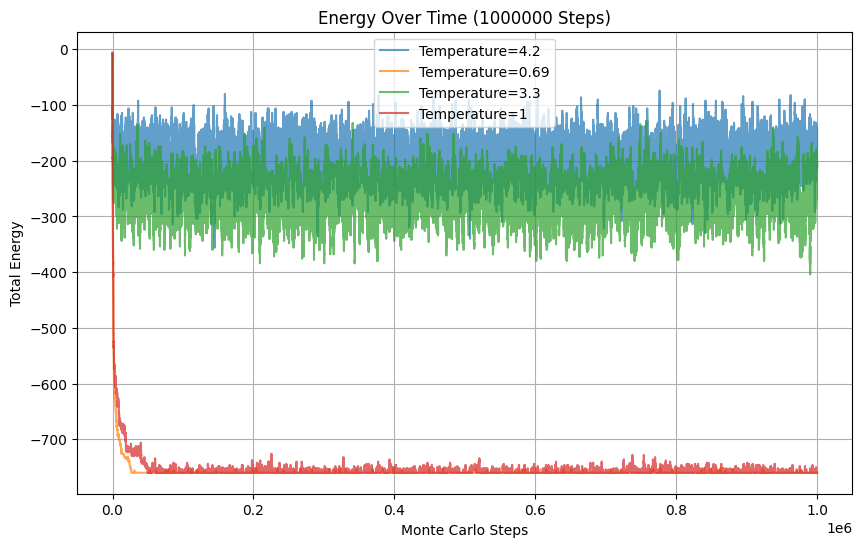

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


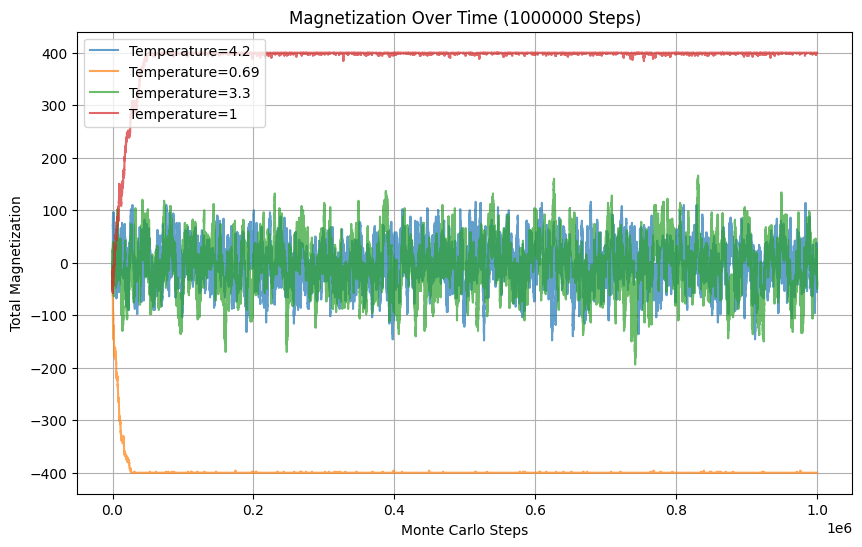

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Set a seed for reproducibility
np.random.seed(9)

L = 20  # Size of lattice
J = 1  # Coupling constant
kb = 1.0  # Boltzmann constant
T = [4.20, 0.69, 3.3, 1]  # Temperature of the system
monte_carlo_steps = 1000000  # Number of Monte Carlo Steps


# Initialized a lattice with size 20x20 and given spins
lattice = np.random.choice([-1, 1], size=(L, L))

# Defining a function to calculate the energy of the lattice
def compute_energy(lattice):
    s1 = lattice[:-1, :] * lattice[1:, :] # Interaction between vertically adjacent spins
    s2 = lattice[:, :-1] * lattice[:, 1:] # Interaction between horizontally adjacent spins
    E = -J * (np.sum(s1) + np.sum(s2)) # Calculating the total energy of the system
    return E

# Function to run the simulation for a given lattice
def simulation(lattice, T):
    current_E = compute_energy(lattice) # Calculating the initial energy of the lattiice
    current_M = np.sum(lattice) # Calculating the initial magnetization by adding all the spins

    E_plot = []  # Initialized an empty array to store energy values over time
    M_plot = []  # Initialized an empty array to store magnetization values over time

    # Iterate the simulation over the given number of steps
    for k in range(monte_carlo_steps):
        i = np.random.randint(0, L) # Choosing a random row index
        j = np.random.randint(0, L) # Choosing a random column index

        # Flippiing the spin of the chosen lattice site
        lattice[i, j] *= -1

        new_E = compute_energy(lattice) # New energy with the updated lattice site
        E_difference = new_E - current_E # Calculating the change in energy due to updated lattice site

        # If the energy increases due to updated lattice site
        if E_difference > 0:
            if np.random.rand() < math.exp(-E_difference/(kb * T)):  # Accept (Note EQ. 10.60 in the book)
                current_E += E_difference # Update the energy
                current_M = np.sum(lattice) # Update the magnetization
            else: # Reject
                lattice[i, j] *= -1  # Flipping the spin again
        # If the energy decreases, the lattice will always be accepted
        else:
            current_E += E_difference # Update the energy
            current_M = np.sum(lattice) # Update the magnetization

        E_plot.append(current_E) # Append the values of energy to the empty list
        M_plot.append(current_M) # Append the values of magnetization to the empty list

    return E_plot, M_plot

# Simulate all the lattices
data = [simulation(lattice.copy(), t) for t in T]

# Plot for energy
plt.style.use('default')
plt.figure(figsize=(10, 6))
# Iterate through energy values for each seed
for x, (E_plot, _) in enumerate(data):
    t = T[x] # Get the specific temperature value
    plt.plot(E_plot, label=f"Temperature={t}", alpha=0.7)
plt.title("Energy Over Time (1000000 Steps)")
plt.xlabel("Monte Carlo Steps")
plt.ylabel("Total Energy")
plt.legend()
plt.grid(True)
plt.show()

# Plot for magnetization
plt.style.use('default')
plt.figure(figsize=(10, 6))
# Iterate through magnetization values for each seed
for x, (_, M_plot) in enumerate(data):
    t = T[x] # Get specific temperature value
    plt.plot(M_plot, label=f"Temperature={t}", alpha=0.7)
plt.title("Magnetization Over Time (1000000 Steps)")
plt.xlabel("Monte Carlo Steps")
plt.ylabel("Total Magnetization")
plt.legend()
plt.grid(True)
plt.show()

We can see that the magnetization stabilize at around -400, meaning the system achieved equilibrium at that point. This is because the system is mainly influenced by temperature and the number of Monte Carlo steps. Note that the initial condition will have less impact once the simulations undergone enough Monte Carlo steps.

Note that the behavior of the system heavily depends on the temperature. If we increase the temperature, the spin flips more frequently, meaning the system is unstable, the energy is higher, and the magnetization is closer to zero. This is inversely proportional if we decrease the temperature, spin flips less frequent, meaning the system is more stable, the energy is lower, and the magnetization is higher.

<font color=red>Correctness of Code: 50/50 </font> \
<font color=red>Discussion of Code and Results: 50/50 </font>